In [ ]:
rm -rf *pyc

### load data

In [1]:
from os.path import expanduser
import pandas as pd
import numpy as np

In [2]:
# path to train and testing data
PATH_train = "../data/training.csv"
PATH_test = "../data/test.csv"

In [3]:
df = pd.read_csv(expanduser(PATH_train))
df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

### Histogram equalization

In [17]:
from skimage.exposure import equalize_hist
from skimage.filters import sobel, sobel_h, sobel_v

In [5]:
df_processed = pd.DataFrame(df['Image'])

In [6]:
df_processed['sobel'] = pd.DataFrame(df['Image'].apply(lambda im: sobel(im.reshape(96, 96)).reshape(-1)))

In [7]:
df_processed['sobel_h'] = pd.DataFrame(df['Image'].apply(lambda im: sobel_h(im.reshape(96, 96)).reshape(-1)))

In [8]:
df_processed['sobel_v'] = pd.DataFrame(df['Image'].apply(lambda im: sobel_v(im.reshape(96, 96)).reshape(-1)))

In [18]:
df_processed['equal_hist'] = pd.DataFrame(df['Image'].apply(lambda im: equalize_hist(im.reshape(96, 96)).reshape(-1)))

In [9]:
col = 'Image'
X = np.vstack(df[col].values).astype(np.float32)
y = df[df.columns[:-1]].values.astype(np.float32)

In [10]:
col = 'sobel'
X_sobel = np.vstack(df_processed[col].values).astype(np.float32)
col = 'sobel_h'
X_sobel_h = np.vstack(df_processed[col].values).astype(np.float32)
col = 'sobel_v'
X_sobel_v = np.vstack(df_processed[col].values).astype(np.float32)

In [14]:
ind = 1100
image1 = X[ind].reshape(96,96)
image2 = X_sobel[ind].reshape(96,96)
image3 = X_sobel_h[ind].reshape(96,96)
image4 = X_sobel_v[ind].reshape(96,96)

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

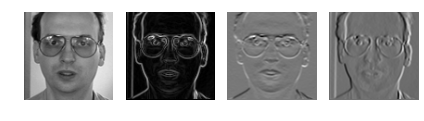

In [16]:
fig, (ax2, ax3, ax4,ax5) = plt.subplots(ncols=4, sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'})

ax2.imshow(image1, cmap=plt.cm.gray)
ax2.axis('off')

ax3.imshow(image2, cmap=plt.cm.gray)
ax3.axis('off')

ax4.imshow(image3, cmap=plt.cm.gray)
ax4.axis('off')

ax5.imshow(image4, cmap=plt.cm.gray)
ax5.axis('off')

plt.tight_layout()

### visualize augmentation

In [ ]:
# import numpy as np
# import matplotlib.pyplot as pyplot
# %matplotlib inline

In [ ]:
# # X = data.X[0:2]
# # y = data.y[0:2]
# temp = temp.reshape(-1, 1, 96, 96)
# X = temp[0:4]
# # y = data.y[0:2]
# # tempX = np.copy(X)
# # tempX =  tempX[:, :, :, ::-1]
# # tempy = np.copy(y)
# # tempy[:,::2] = 96 - tempy[:,::2]
# # X = np.concatenate((X, tempX), axis=0)
# # y = np.concatenate((y, tempy), axis=0)

# dehttp://localhost:8888/notebooks/DevTest.ipynb#f plot_sample(x, y=None, axis=None):
#     img = x.reshape(96, 96)
#     axis.imshow(img,cmap='gray',zorder = 1)
# #     axis.scatter(y[0::2] , y[1::2], marker='x', s=10, zorder = 2)
# y = [False, False, False, False]
# fig = pyplot.figure(figsize=(6, 3))
# ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
# idx = 0
# plot_sample(X[idx], y[idx], ax)
# ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
# idx= 3
# plot_sample(X[idx], y[idx], ax)
# pyplot.show()